In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
data = [df, test_df]

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# rate of women survived

(df.loc[df['Sex']=='female']['Survived'] == 1).sum() / len(df.loc[df['Sex']=='female']['Survived'])

0.7420382165605095

In [9]:
# rate of men survived

(df.loc[df['Sex']=='male']['Survived'] == 1).sum() / len(df.loc[df['Sex']=='male']['Survived'])

0.18890814558058924

In [10]:
women = df.loc[df['Sex']=='female']

In [11]:
# average age of survived women

women[women['Survived'] == 1]['Age'].mean()

28.84771573604061

In [12]:
# average age of not survived women

women[women['Survived'] == 0]['Age'].mean()

25.046875

In [13]:
men = df.loc[df['Sex']=='male']

In [14]:
# average age of survived men

men[men['Survived'] == 1]['Age'].mean()

27.276021505376345

In [15]:
# average age of not survived men

men[men['Survived'] == 0]['Age'].mean()

31.618055555555557

In [16]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
class3 = df.loc[df['Pclass'] == 3]
class2 = df.loc[df['Pclass'] == 2]
class1 = df.loc[df['Pclass'] == 1]

In [18]:
# 3d class ticket owner survived rate

(class3['Survived'] == 1).sum() / len(class3['Survived'] == 1)

0.24236252545824846

In [19]:
# 2nd class ticket owner survived rate

(class2['Survived'] == 1).sum() / len(class2['Survived'] == 1)

0.47282608695652173

In [20]:
# 1st class ticket owner survived rate

(class1['Survived'] == 1).sum() / len(class1['Survived'] == 1)

0.6296296296296297

<AxesSubplot:>

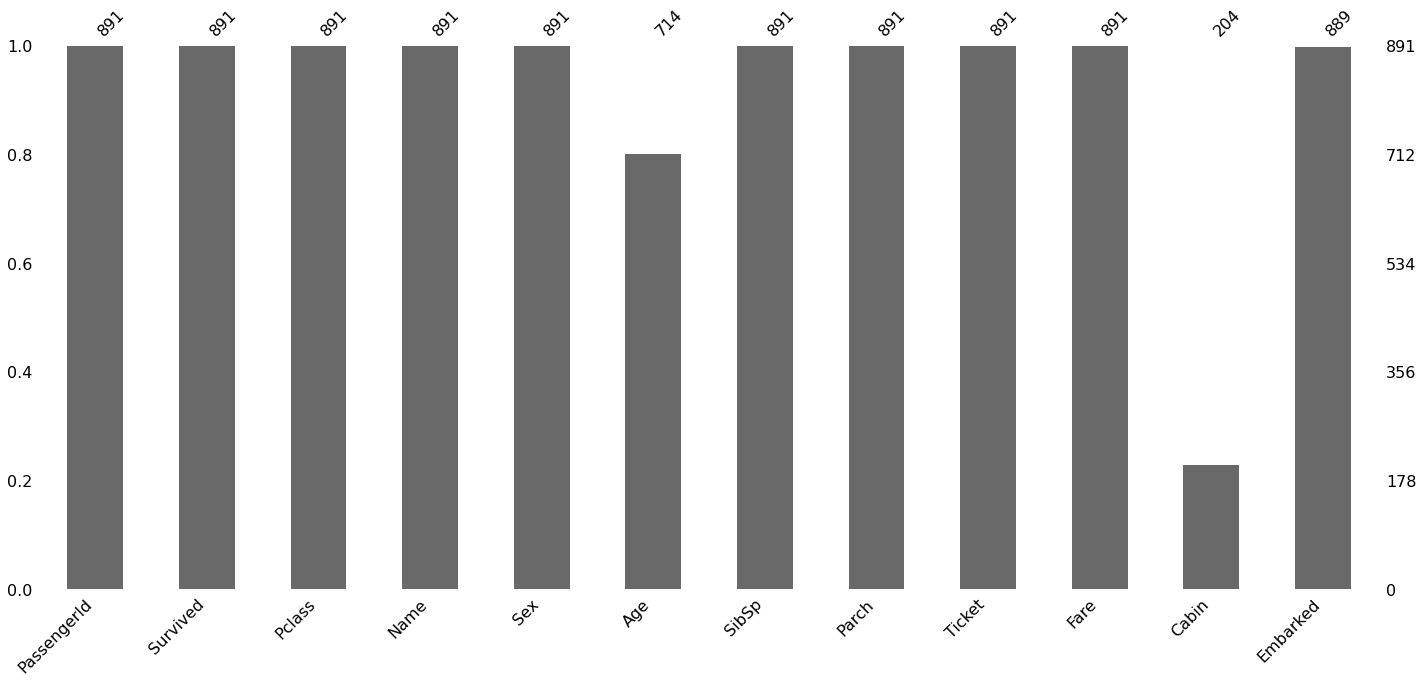

In [21]:
msno.bar(df)

<AxesSubplot:>

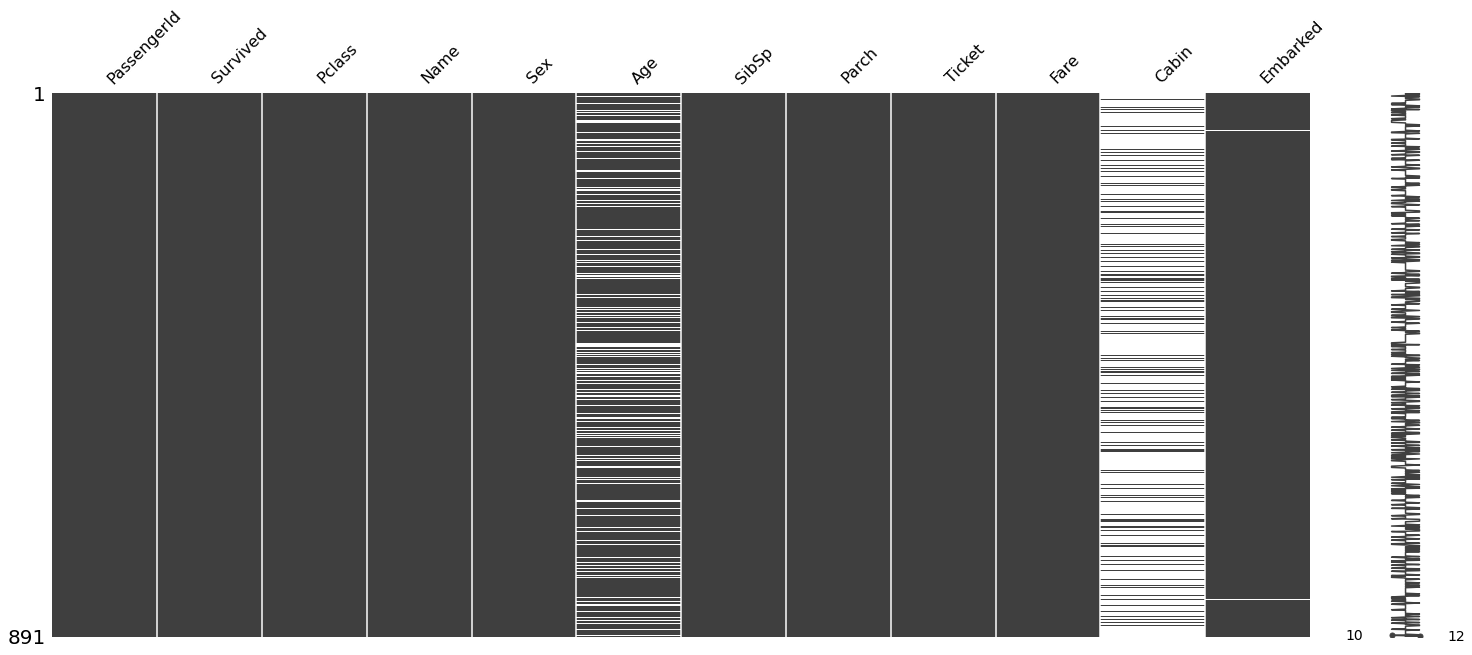

In [22]:
msno.matrix(df)

In [23]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

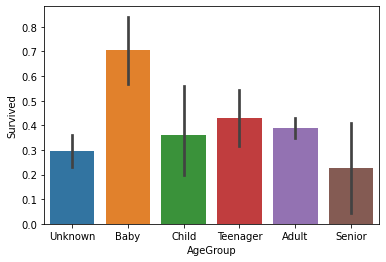

In [24]:
df['Age'] = df['Age'].fillna(-0.5)
test_df['Age'] = test_df['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins, labels = labels)
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins, labels = labels)


sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.show()

In [25]:
heatmapdf = df.drop(['PassengerId','Age'], axis=1)

<AxesSubplot:>

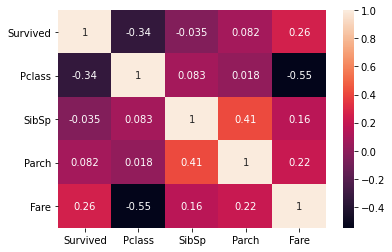

In [26]:
sns.heatmap(heatmapdf.corr(),annot=True)

<AxesSubplot:xlabel='Age'>

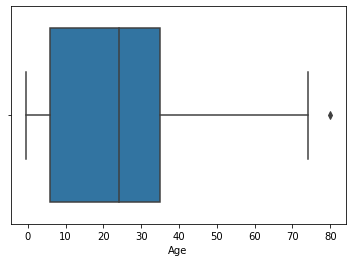

In [27]:
sns.boxplot(data=df, x='Age')

<AxesSubplot:xlabel='Fare'>

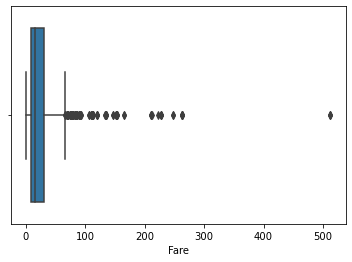

In [28]:
sns.boxplot(data=df, x='Fare')

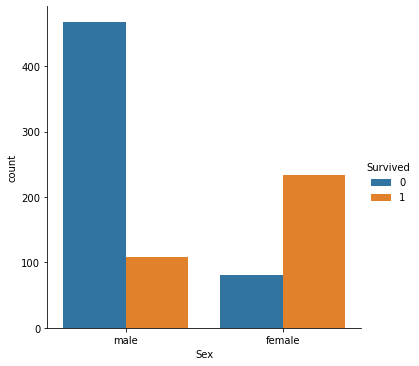

In [29]:
sns.catplot(data=df, x='Sex', hue='Survived', kind='count')

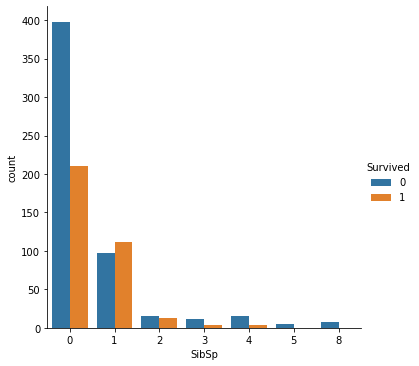

In [30]:
sns.catplot(data=df, x='SibSp', hue='Survived', kind='count')

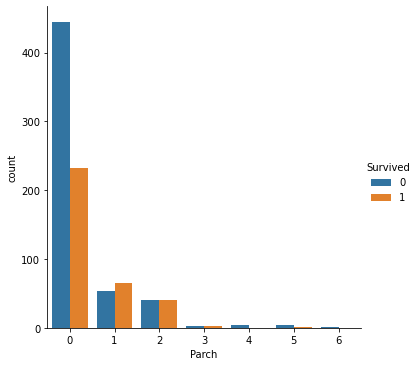

In [31]:
sns.catplot(data=df, x='Parch', hue='Survived', kind='count')

In [32]:
genders = {'male' : 0, 'female' : 1}

In [33]:
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Adult


In [35]:
for dataset in data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [36]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Mme           1
Jonkheer      1
Sir           1
Lady          1
Ms            1
Don           1
Countess      1
Capt          1
Name: Title, dtype: int64

In [37]:
low_prevalence = ['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer']

In [38]:
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(low_prevalence, 'Rare')

In [39]:
titles = {'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'Rare':5}
for dataset in data:
    dataset['Title'] = dataset['Title'].map(titles)

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Adult,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Adult,1


In [41]:
age_mapping = {'Baby':1, 'Child':2, 'Teenager':3, 'Adult':4, 'Senior':5, 'Unknown':6}

for dataset in data:
    dataset['AgeGroup'] = dataset['AgeGroup'].map(age_mapping)

In [42]:
test_df['Title'].unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [43]:
# As we see there are nan value in test data then changed it as like 'Rare' value.

test_df['Title'] = test_df['Title'].replace(np.nan, 5)

In [44]:
test_df['Title'].unique()

array([1., 2., 3., 4., 5.])

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,4,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,4,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,4,1


In [46]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [47]:
test_df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [48]:
# Only 2 missing embarkment value, that's why these two valued as like the most counted embarked value which is 'S'

embarkment = {np.nan : 1, 'S':1, 'C':2, 'Q':3}

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarkment)

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,4,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,4,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,4,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,4,1


In [50]:
for dataset in data:
    dataset['CabinFeature'] = dataset['Cabin'].str.extract(r'([A-Z])', expand=True)

In [51]:
test_df['CabinFeature'].unique()

array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [52]:
cabin_mapping = {np.nan : 0, 'C':3, 'E':6, 'D':7, 'A':2, 'B':5, 'F':4, 'G':1, 'T':1}

In [53]:
for dataset in data:
    dataset['CabinFeature'] = dataset['CabinFeature'].map(cabin_mapping)

In [54]:
for dataset in data:
    dataset.drop(['Name','Age','Ticket','Cabin'], axis=1, inplace=True)

In [55]:
test_df.describe()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,CabinFeature
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,0.447368,0.392344,35.627188,1.464115,1.763158,0.925837
std,120.810458,0.841838,0.481622,0.896760,0.981429,55.907576,0.685516,1.029019,1.912160
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,996.250000,1.000000,0.000000,0.000000,0.000000,7.895800,1.000000,1.000000,0.000000
50%,1100.500000,3.000000,0.000000,0.000000,0.000000,14.454200,1.000000,1.000000,0.000000
75%,1204.750000,3.000000,1.000000,1.000000,0.000000,31.500000,2.000000,3.000000,0.000000
max,1309.000000,3.000000,1.000000,8.000000,9.000000,512.329200,3.000000,5.000000,7.000000


<AxesSubplot:>

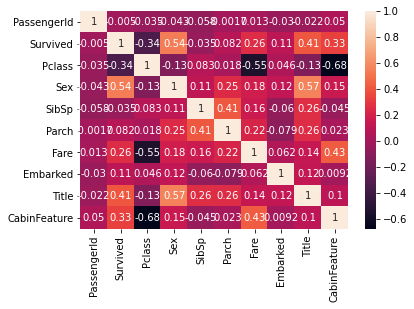

In [56]:
sns.heatmap(df.corr(), annot=True)

In [57]:
# 1 Fare value is less in test data. need to fill it. It can be filled with average value of its 
# Pclass fare value
test_df[test_df['Fare'].isnull()]['Pclass']

152    3
Name: Pclass, dtype: int64

In [58]:
mean_value = test_df[test_df['Pclass']==3]['Fare'].mean()

In [59]:
test_df['Fare'] = test_df['Fare'].replace(np.nan, mean_value)

In [60]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title,CabinFeature
0,1,0,3,0,1,0,7.2500,1,4,1,0
1,2,1,1,1,1,0,71.2833,2,4,2,3
2,3,1,3,1,0,0,7.9250,1,4,3,0
3,4,1,1,1,1,0,53.1000,1,4,2,3
4,5,0,3,0,0,0,8.0500,1,4,1,0


In [61]:
test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title,CabinFeature
0,892,3,0,0,0,7.8292,3,4,1.0,0
1,893,3,1,1,0,7.0000,1,4,2.0,0
2,894,2,0,0,0,9.6875,3,5,1.0,0
3,895,3,0,0,0,8.6625,1,4,1.0,0
4,896,3,1,1,1,12.2875,1,4,2.0,0


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [63]:
X = df.loc[:,'Pclass':'CabinFeature']
y = df['Survived']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

In [72]:
modelLR = LogisticRegression(random_state=11)
modelLR.fit(X_train,y_train)
y_prediction = modelLR.predict(X_test)

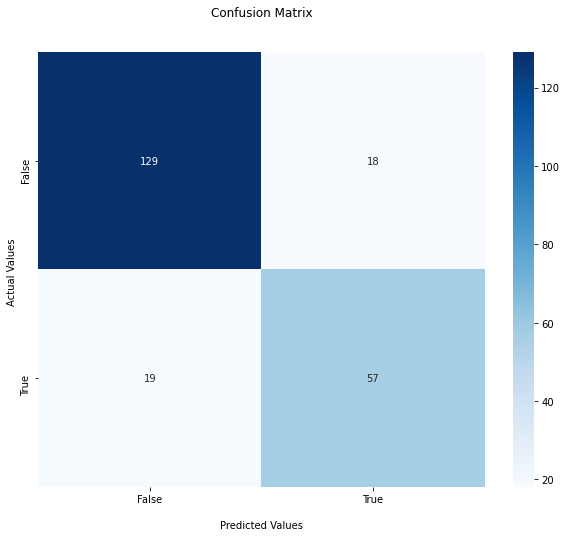

In [73]:
ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt='d', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [81]:
print(classification_report(y_test,y_prediction))

print(f"accuracy score: {accuracy_score(y_prediction, y_test)*100}")

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       147
           1       0.76      0.75      0.75        76

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223

accuracy score: 83.40807174887892


In [83]:
modelSVC = SVC(random_state=11)

modelSVC.fit(X_train, y_train)
y_prediction = modelSVC.predict(X_test)

print(classification_report(y_test,y_prediction))

print(f"accuracy score: {accuracy_score(y_prediction, y_test)*100}")

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       147
           1       0.78      0.33      0.46        76

    accuracy                           0.74       223
   macro avg       0.76      0.64      0.65       223
weighted avg       0.75      0.74      0.70       223

accuracy score: 73.99103139013454


In [85]:
modelLSVC = LinearSVC(random_state=11)

modelLSVC.fit(X_train, y_train)
y_prediction = modelLSVC.predict(X_test)

print(classification_report(y_test,y_prediction))

print(f"accuracy score: {accuracy_score(y_prediction, y_test)*100}")

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       147
           1       0.83      0.63      0.72        76

    accuracy                           0.83       223
   macro avg       0.83      0.78      0.80       223
weighted avg       0.83      0.83      0.82       223

accuracy score: 82.95964125560538
